In [1]:
import json
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import geopandas as gpd
from cmcrameri import cm

from pandas import concat, DataFrame, read_csv
from numpy import isnan
from IPython.display import HTML

import functions as ft

sns.set_style('white')

# Settings

In [2]:
base_url = "https://service.pdok.nl"

In [3]:
ENDPOINT_CITY_BOUNDARIES = "/cbs/gebiedsindelingen/2025/wfs/v1_0?request=GetFeature&service=WFS&version=2.0.0&typeName=gemeente_gegeneraliseerd&outputFormat=json"

In [4]:
# projections for different coordinate systems
projection_rd_amersfoort = 'epsg:28992'
projection_geocoordinates = 'epsg:4326'

In [5]:
dir_geotop = 'input/GeoTOP_v01r6s1_csv_bestanden/'
dir_surface = 'input/maaiveld_dtm/'
dir_export = 'output/'

# Collect Data

### Import GeoTop

In [6]:
ls_files = sorted([file for file in glob(dir_geotop + '*.csv')])
ls_files

['input/GeoTOP_v01r6s1_csv_bestanden/zuidholland_B01.csv',
 'input/GeoTOP_v01r6s1_csv_bestanden/zuidholland_B02.csv',
 'input/GeoTOP_v01r6s1_csv_bestanden/zuidholland_B03.csv',
 'input/GeoTOP_v01r6s1_csv_bestanden/zuidholland_B04.csv',
 'input/GeoTOP_v01r6s1_csv_bestanden/zuidholland_B05.csv',
 'input/GeoTOP_v01r6s1_csv_bestanden/zuidholland_B06.csv',
 'input/GeoTOP_v01r6s1_csv_bestanden/zuidholland_B07.csv',
 'input/GeoTOP_v01r6s1_csv_bestanden/zuidholland_B08.csv',
 'input/GeoTOP_v01r6s1_csv_bestanden/zuidholland_B09.csv']

In [7]:
ls_data = [read_csv(file, index_col=[0,1,2], engine="pyarrow") for file in ls_files]

data = concat(ls_data).sort_index()
data.head(10)

lithostrat  lithoklasse  kans_1_veen  kans_2_klei  \
x       y        z                                                           
58550.0 437550.0 -49.75        5120            6         0.00         0.17   
                 -49.25        5120            6         0.00         0.24   
                 -48.75        5120            6         0.02         0.17   
                 -48.25        5120            6         0.04         0.24   
                 -47.75        5120            1         0.06         0.21   
                 -47.25        5120            6         0.04         0.13   
                 -46.75        5120            6         0.02         0.13   
                 -46.25        5120            2         0.02         0.27   
                 -45.75        5120            5         0.02         0.25   
                 -45.25        5120            6         0.02         0.25   

                         kans_3_kleiig_zand  kans_4_vervallen  \
x       y        z                                              
58550.0 437550.0 -49.75                0.23               0.0   
                 -49.25                0.26               0.0   
                 -48.75                0.31               0.0   
                 -48.25                0.32               0.0   
                 -47.75                0.33               0.0   
                 -47.25                0.23               0.0   
                 -46.75                0.15               0.0   
                 -46.25                0.21               0.0   
                 -45.75                0.33               0.0   
                 -45.25                0.33               0.0   

                         kans_5_zand_fijn  kans_6_zand_matig_grof  \
x       y        z                                                  
58550.0 437550.0 -49.75              0.24                    0.28   
                 -49.25              0.18                    0.24   
                 -48.75              0.18                    0.25   
                 -48.25              0.15                    0.19   
                 -47.75              0.05                    0.27   
                 -47.25              0.22                    0.28   
                 -46.75              0.30                    0.29   
                 -46.25              0.23                    0.18   
                 -45.75              0.19                    0.15   
                 -45.25              0.16                    0.17   

                         kans_7_zand_grof  kans_8_grind  kans_9_schelpen  \
x       y        z                                                         
58550.0 437550.0 -49.75              0.08           0.0              0.0   
                 -49.25              0.08           0.0              0.0   
                 -48.75              0.07           0.0              0.0   
                 -48.25              0.06           0.0              0.0   
                 -47.75              0.08           0.0              0.0   
                 -47.25              0.10           0.0              0.0   
                 -46.75              0.11           0.0              0.0   
                 -46.25              0.09           0.0              0.0   
                 -45.75              0.06           0.0              0.0   
                 -45.25              0.07           0.0              0.0   

                         modelonzekerheid_lithoklasse  \
x       y        z                                      
58550.0 437550.0 -49.75                          0.86   
                 -49.25                          0.86   
                 -48.75                          0.88   
                 -48.25                          0.90   
                 -47.75                          0.87   
                 -47.25                          0.92   
                 -46.75                          0.89   
                 -46.25                          0.9

## Get city of Rotterdam border

In [8]:
municipalities = gpd.read_file(base_url + ENDPOINT_CITY_BOUNDARIES)
municipalities.head()

,statcode,jrstatcode,statnaam,rubriek,id,geometry
0,GM0014,2025GM0014,Groningen,gemeente,1,"MULTIPOLYGON (((245269.7 592530.869, 245344.71..."
1,GM0034,2025GM0034,Almere,gemeente,2,"MULTIPOLYGON (((146891.056 493291.709, 147422...."
2,GM0037,2025GM0037,Stadskanaal,gemeente,3,"MULTIPOLYGON (((263763.866 566430.392, 263988...."
3,GM0047,2025GM0047,Veendam,gemeente,4,"MULTIPOLYGON (((256231.909 572319.213, 258595...."
4,GM0050,2025GM0050,Zeewolde,gemeente,5,"MULTIPOLYGON (((164905.825 488530.789, 165218...."


In [9]:
rotterdam = municipalities[municipalities["statnaam"] == "Rotterdam"]

rotterdam_rd = rotterdam.to_crs(epsg=projection_rd_amersfoort.split('epsg:')[1])
rotterdam_rd_json = json.loads(rotterdam_rd.to_json())

rotterdam_geo = rotterdam.to_crs(epsg=projection_geocoordinates.split('epsg:')[1])
rotterdam_geo_json = json.loads(rotterdam_geo.to_json())

In [10]:
rotterdam_rd_border = DataFrame(
    rotterdam_rd_json['features'][0]['geometry']['coordinates'][0][0], columns=['x', 'y']
    )
rotterdam_rd_border

,x,y
0,70083.9840,445080.5930
1,69940.7423,444802.1262
2,70009.7580,444769.3940
3,69819.5960,444392.3730
4,70367.3151,444183.4945
...,...,...
406,68730.7140,446167.7340
407,68821.9000,445974.8370
408,69036.6280,445664.3240
409,69243.8148,445543.2807


# Crop GeoTOP data to City of Rotterdam

In [11]:
gdf_points = gpd.GeoDataFrame(
    data, 
    geometry=gpd.points_from_xy(data.reset_index().x, data.reset_index().y), 
    crs=projection_rd_amersfoort
)

In [13]:
points_in_rotterdam = gdf_points[gdf_points.geometry.within(rotterdam_rd.union_all())]
points_in_rotterdam.head()

lithostrat  lithoklasse  kans_1_veen  kans_2_klei  \
x       y        z                                                           
58550.0 437550.0 -49.75        5120            6         0.00         0.17   
                 -49.25        5120            6         0.00         0.24   
                 -48.75        5120            6         0.02         0.17   
                 -48.25        5120            6         0.04         0.24   
                 -47.75        5120            1         0.06         0.21   

                         kans_3_kleiig_zand  kans_4_vervallen  \
x       y        z                                              
58550.0 437550.0 -49.75                0.23               0.0   
                 -49.25                0.26               0.0   
                 -48.75                0.31               0.0   
                 -48.25                0.32               0.0   
                 -47.75                0.33               0.0   

                         kans_5_zand_fijn  kans_6_zand_matig_grof  \
x       y        z                                                  
58550.0 437550.0 -49.75              0.24                    0.28   
                 -49.25              0.18                    0.24   
                 -48.75              0.18                    0.25   
                 -48.25              0.15                    0.19   
                 -47.75              0.05                    0.27   

                         kans_7_zand_grof  kans_8_grind  kans_9_schelpen  \
x       y        z                                                         
58550.0 437550.0 -49.75              0.08           0.0              0.0   
                 -49.25              0.08           0.0              0.0   
                 -48.75              0.07           0.0              0.0   
                 -48.25              0.06           0.0              0.0   
                 -47.75              0.08           0.0              0.0   

                         modelonzekerheid_lithoklasse  \
x       y        z                                      
58550.0 437550.0 -49.75                          0.86   
                 -49.25                          0.86   
                 -48.75                          0.88   
                 -48.25                          0.90   
                 -47.75                          0.87   

                         modelonzekerheid_lithostrat              geometry  
x       y        z                                                          
58550.0 437550.0 -49.75                         0.37  POINT (58550 437550)  
                 -49.25                         0.42  POINT (58550 437550)  
                 -48.75                         0.47  POINT (58550 437550)  
                 -48.25                         0.50  POINT (58550 437550)  
                 -47.75                         0.53  POINT (58550 437550)

In [14]:
print(f"Data points available within Rotterdam {points_in_rotterdam.shape}")

Data points available within Rotterdam (2641848, 14)


## Convert RD coordinates to Lat|Lon

In [15]:
points_in_rotterdam = ft.convert_rd_into_geocoordinates(points_in_rotterdam)
points_in_rotterdam.head()

lithostrat  lithoklasse  kans_1_veen  kans_2_klei  \
lon      lat       z                                                           
3.985201 51.918065 -49.75        5120            6         0.00         0.17   
                   -49.25        5120            6         0.00         0.24   
                   -48.75        5120            6         0.02         0.17   
                   -48.25        5120            6         0.04         0.24   
                   -47.75        5120            1         0.06         0.21   

                           kans_3_kleiig_zand  kans_4_vervallen  \
lon      lat       z                                              
3.985201 51.918065 -49.75                0.23               0.0   
                   -49.25                0.26               0.0   
                   -48.75                0.31               0.0   
                   -48.25                0.32               0.0   
                   -47.75                0.33               0.0   

                           kans_5_zand_fijn  kans_6_zand_matig_grof  \
lon      lat       z                                                  
3.985201 51.918065 -49.75              0.24                    0.28   
                   -49.25              0.18                    0.24   
                   -48.75              0.18                    0.25   
                   -48.25              0.15                    0.19   
                   -47.75              0.05                    0.27   

                           kans_7_zand_grof  kans_8_grind  kans_9_schelpen  \
lon      lat       z                                                         
3.985201 51.918065 -49.75              0.08           0.0              0.0   
                   -49.25              0.08           0.0              0.0   
                   -48.75              0.07           0.0              0.0   
                   -48.25              0.06           0.0              0.0   
                   -47.75              0.08           0.0              0.0   

                           modelonzekerheid_lithoklasse  \
lon      lat       z                                      
3.985201 51.918065 -49.75                          0.86   
                   -49.25                          0.86   
                   -48.75                          0.88   
                   -48.25                          0.90   
                   -47.75                          0.87   

                           modelonzekerheid_lithostrat              geometry  
lon      lat       z                                                          
3.985201 51.918065 -49.75                         0.37  POINT (58550 437550)  
                   -49.25                         0.42  POINT (58550 437550)  
                   -48.75                         0.47  POINT (58550 437550)  
                   -48.25                         0.50  POINT (58550 437550)  
                   -47.75                         0.53  POINT (58550 437550)

In [16]:
unique_pairs = points_in_rotterdam.reset_index()[['lat', 'lon']].drop_duplicates()

df_unique_pairs = points_in_rotterdam.reset_index().loc[unique_pairs.index]
df_unique_pairs.head()

,lon,lat,z,lithostrat,lithoklasse,kans_1_veen,kans_2_klei,kans_3_kleiig_zand,kans_4_vervallen,kans_5_zand_fijn,kans_6_zand_matig_grof,kans_7_zand_grof,kans_8_grind,kans_9_schelpen,modelonzekerheid_lithoklasse,modelonzekerheid_lithostrat,geometry
0,3.985201,51.918065,-49.75,5120,6,0.00,0.17,0.23,0.0,0.24,0.28,0.08,0.0,0.0,0.86,0.37,POINT (58550 437550)
98,3.985173,51.918963,-49.75,5120,6,0.01,0.16,0.23,0.0,0.25,0.31,0.04,0.0,0.0,0.85,0.30,POINT (58550 437650)
197,3.985145,51.919862,-49.75,5120,6,0.02,0.19,0.29,0.0,0.20,0.26,0.04,0.0,0.0,0.87,0.37,POINT (58550 437750)
297,3.985117,51.920760,-49.75,5120,6,0.02,0.17,0.31,0.0,0.20,0.27,0.03,0.0,0.0,0.85,0.36,POINT (58550 437850)
397,3.986655,51.918082,-49.75,5120,6,0.00,0.20,0.20,0.0,0.26,0.28,0.06,0.0,0.0,0.85,0.27,POINT (58650 437550)


In [17]:
center_lat, center_lon = unique_pairs.median()

fig = px.scatter_map(
    df_unique_pairs,
    lat="lat", lon="lon", center={"lat": center_lat, "lon": center_lon},
    zoom=9, height=600, map_style="carto-positron"
    )

for feature in rotterdam_geo_json["features"]:
    fig.add_trace(go.Scattermapbox(
        lat=[
            coord[1] for polygon in feature["geometry"]["coordinates"] 
            for coord in (polygon[0] if feature["geometry"]["type"] == "MultiPolygon" else polygon)
            ],
        lon=[
            coord[0] for polygon in feature["geometry"]["coordinates"] 
            for coord in (polygon[0] if feature["geometry"]["type"] == "MultiPolygon" else polygon)
            ],
        mode="lines",
        line=dict(color="red", width=3),
        name="Rotterdam boundary"
    ))

fig.show()

/var/folders/lx/z70mzvpx4ls9np3hfbhll4wr0000gn/T/ipykernel_94741/4052320695.py:10: DeprecationWarning:

*scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



# Get surface layer for Rotterdam city

### get RD coordinates of unique points within Rotterdam

In [18]:
unique_pairs_coords_selected = ft.get_surface_layer_of_area(df_unique_pairs, dir_surface)

In [ ]:
cm.bilbao

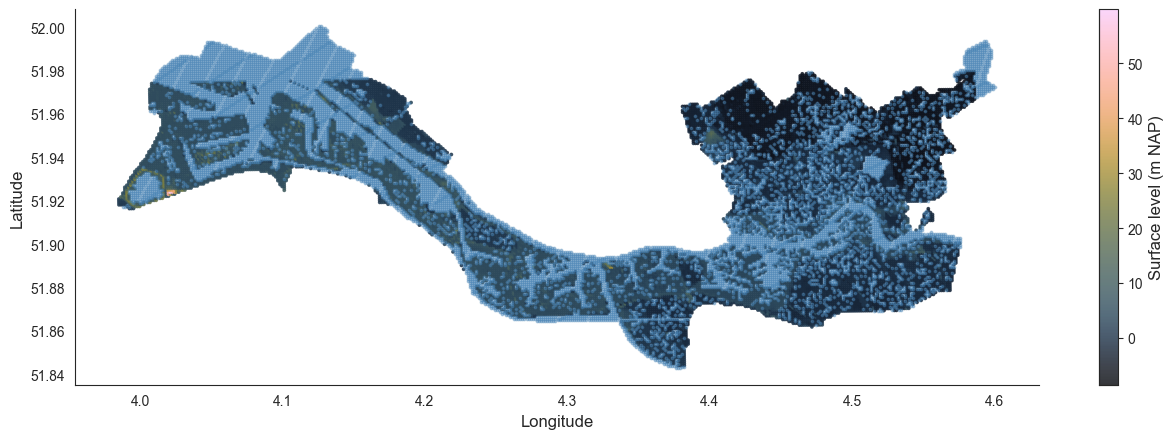

In [ ]:
fig, ax = plt.subplots(figsize=(13, 4.5))

sc = ax.scatter(
    unique_pairs_coords_selected.lon, 
    unique_pairs_coords_selected.lat, 
    c=unique_pairs_coords_selected.surface_level_m_NAP, 
    cmap=cm.batlowK,                    
    s=3,                              
    alpha=0.8
)

water_idx = unique_pairs_coords_selected.loc[
    unique_pairs_coords_selected['surface_level_m_NAP'].isna(), 
    'surface_level_m_NAP'
    ].index

scw = ax.scatter(
    unique_pairs_coords_selected.loc[water_idx, 'lon'], 
    unique_pairs_coords_selected.loc[water_idx, 'lat'], 
    color='steelblue',
    s=3,
    alpha=0.4
)



cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Surface level (m NAP)', fontsize=12)

ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

sns.despine()
plt.tight_layout()
plt.show()

#fig.savefig('output/plots/elevation_map_Rotterdam.png', dpi=300)

replace NaN by 0

In [37]:
unique_pairs_coords_selected.loc[
    unique_pairs_coords_selected['surface_level_m_NAP'].isna(),
    'surface_level_m_NAP'
] = 0

In [38]:
unique_pairs_coords_selected.surface_level_m_NAP.unique()

array([ 2.1032,  2.0537,  2.029 , ..., -4.9621, -4.9499, -4.9358],
      shape=(14628,), dtype=float32)